# GRID SEARCH

[[64  4]
 [ 3 29]]
Accuracy:90.33%
Standard Deviation:6.57%
Best Accuracy:90.67%
Best Parameters: {'C': 0.5, 'gamma': 0.6, 'kernel': 'rbf'}


C:\Users\ndhan\AppData\Local\Temp\ipykernel_18528\382912552.py:59: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_set[y_set==j,0],x_set[y_set==j,1],c=ListedColormap(("salmon","dodgerblue"))(i),label=j)


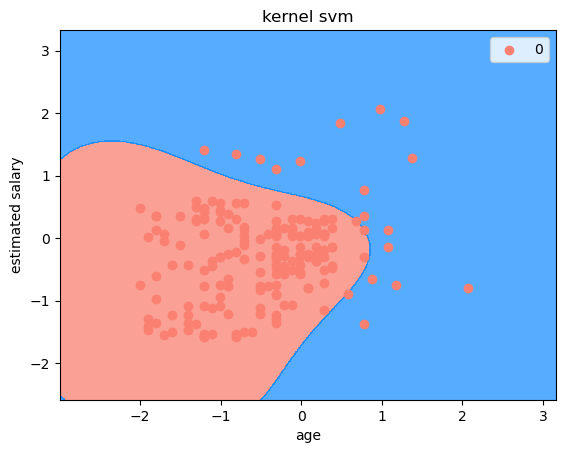

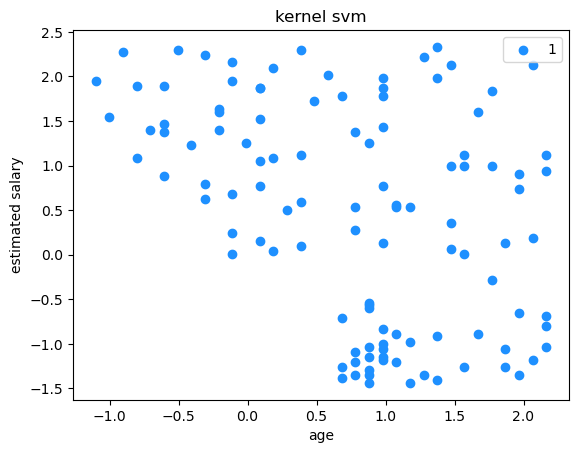

C:\Users\ndhan\AppData\Local\Temp\ipykernel_18528\382912552.py:77: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_set[y_set==j,0],x_set[y_set==j,1],c=ListedColormap(("salmon","dodgerblue"))(i),label=j)


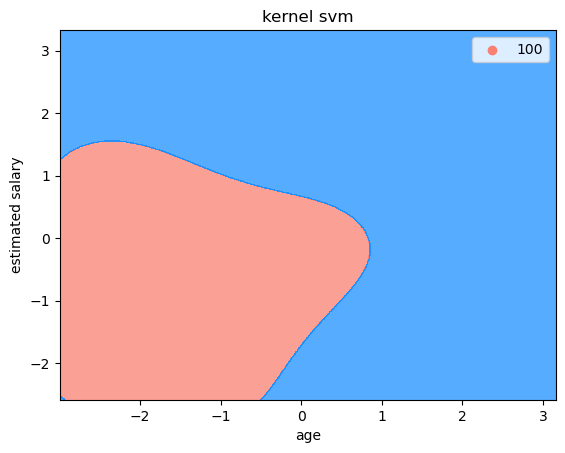

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

df=pd.read_csv("Social_Network_Ads.csv")
x=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)


from sklearn.svm import SVC
classifier=SVC(kernel="rbf",random_state=0)
classifier.fit(x_train,y_train)


from sklearn.metrics import confusion_matrix,accuracy_score
y_pred=classifier.predict(x_test)
cm=confusion_matrix(y_test,y_pred)
print(cm)
accuracy_score(y_test,y_pred)


from sklearn.model_selection import cross_val_score
accuracies=cross_val_score(estimator=classifier,X=x_train,y=y_train,cv=10)
print("Accuracy:{:.2f}%".format(accuracies.mean()*100))
print("Standard Deviation:{:.2f}%".format(accuracies.std()*100))


from sklearn.model_selection import GridSearchCV
parameters=[{"C":[0.25,0.5,0.75,1],"kernel":["linear"]},
           {"C":[0.25,0.5,0.75,1],"kernel":["rbf"],
           "gamma":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]}]


grid_search=GridSearchCV (estimator=classifier,param_grid=parameters,scoring="accuracy",cv=10,n_jobs=-1)
grid_search.fit(x_train,y_train)
best_accuracy=grid_search.best_score_
best_parameters=grid_search.best_params_
print("Best Accuracy:{:.2f}%".format(best_accuracy*100))
print("Best Parameters:",best_parameters)

# VISUALISING THE TRAINING DATASET

from matplotlib.colors import ListedColormap
x_set,y_set=x_train,y_train
x1,x2=np.meshgrid(np.arange(start=x_set[:,0].min()-1,stop=x_set[:,0].max()+1,step=0.01),
                 np.arange(start=x_set[:,1].min()-1,stop=x_set[:,1].max()+1,step=0.01))
plt.contourf(x1,x2,classifier.predict(np.array([x1.ravel(),x2.ravel()]).T).reshape(x1.shape),alpha=0.75,cmap=ListedColormap(("salmon","dodgerblue")))
plt.xlim(x1.min(),x1.max())
plt.ylim(x2.min(),x2.max())
for i,j in enumerate (np.unique(y_set)):
    plt.scatter(x_set[y_set==j,0],x_set[y_set==j,1],c=ListedColormap(("salmon","dodgerblue"))(i),label=j)
    plt.title("kernel svm")
    plt.xlabel("age")
    plt.ylabel("estimated salary")
    plt.legend()
    plt.show()


# VISUALISING THE TESTING DATASET

from matplotlib.colors import ListedColormap
x_set,y_set=x_test,y_test
x1,x2=np.meshgrid(np.arange(start=x_set[:,0].min()-1,stop=x_set[:,0].max()+1,step=0.01),
                 np.arange(start=x_set[:,1].min()-1,stop=x_set[:,1].max()+1,step=0.01))
plt.contourf(x1,x2,classifier.predict(np.array([x1.ravel(),x2.ravel()]).T).reshape(x1.shape),alpha=0.75,cmap=ListedColormap(("salmon","dodgerblue")))
plt.xlim(x1.min(),x1.max())
plt.ylim(x2.min(),x2.max())
for i,j in enumerate (np.unique(y_set.shape)):
    plt.scatter(x_set[y_set==j,0],x_set[y_set==j,1],c=ListedColormap(("salmon","dodgerblue"))(i),label=j)
    plt.title("kernel svm")
    plt.xlabel("age")
    plt.ylabel("estimated salary")
    plt.legend()
    plt.show()